In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from datasets import load_dataset
import seaborn as sns

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

  0%|          | 0/2 [00:00<?, ?it/s]

Training Random Forest...
Random Forest results:
Confusion matrix:
[[5298  252  264  142]
 [  66 5892   57   43]
 [ 202  105 5093  511]
 [ 250  135  530 5160]]
Train accuracy: 1.000
Test accuracy: 0.893
Train loss: 0.112
Test loss: 0.411



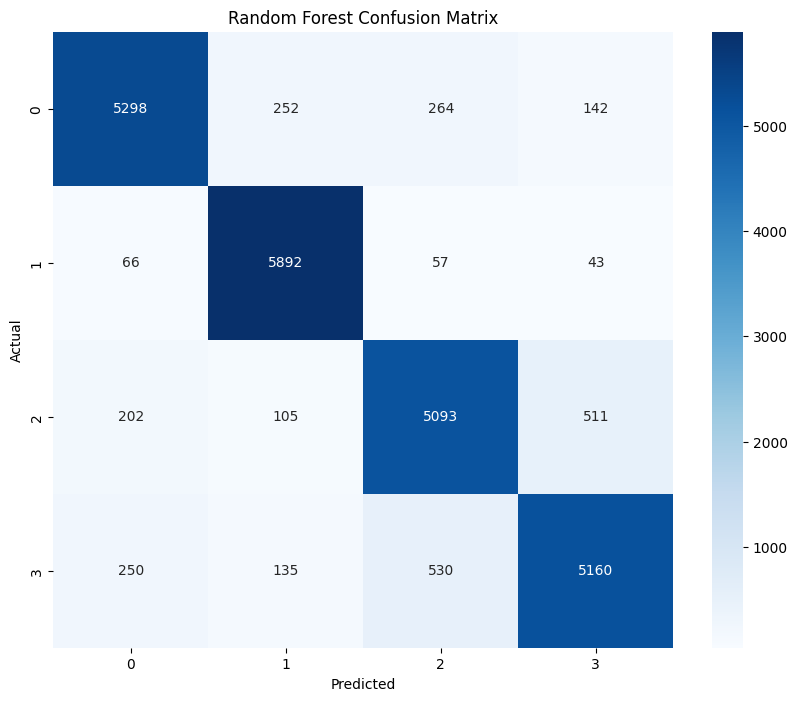

Training Linear Classifier...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear Classifier results:
Confusion matrix:
[[5345  207  243  161]
 [  51 5936   41   30]
 [ 185   52 5231  443]
 [ 197   58  438 5382]]
Train accuracy: 0.936
Test accuracy: 0.912
Train loss: 0.238
Test loss: 0.295



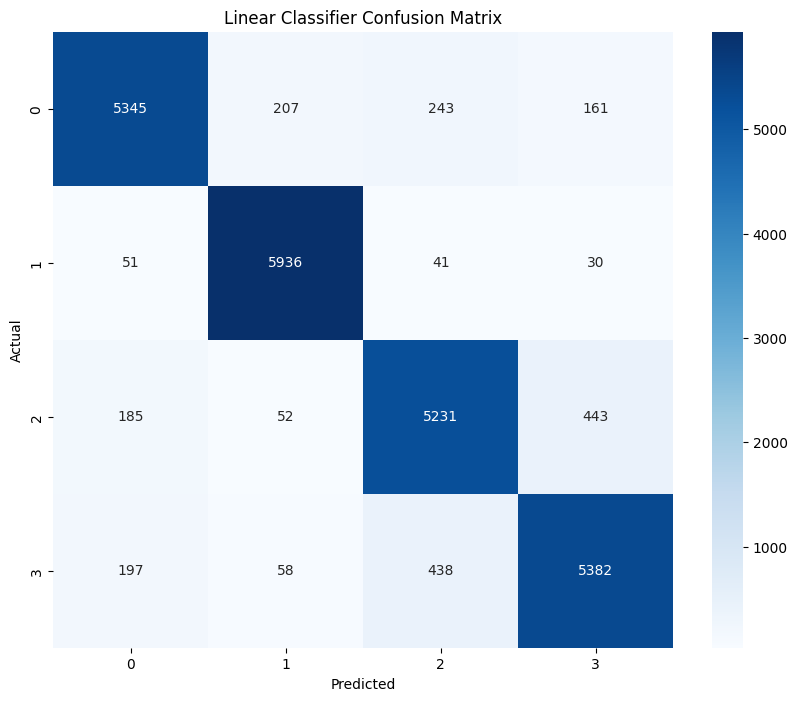

Training Neural Network...
Neural Network results:
Confusion matrix:
[[5289  173  288  206]
 [ 100 5835   75   48]
 [ 240   55 5179  437]
 [ 226   62  525 5262]]
Train accuracy: 0.999
Test accuracy: 0.899
Train loss: 0.003
Test loss: 0.615



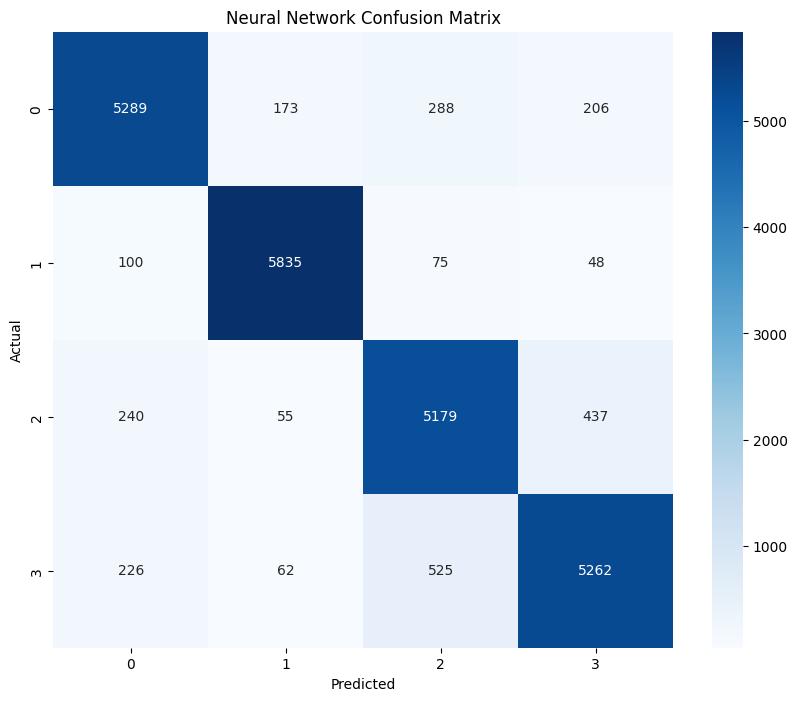

In [ ]:
# Load the dataset
dataset = load_dataset("ag_news")
df = pd.DataFrame({'text': dataset["train"]["text"], 'label': dataset["train"]["label"]})

X = df['text']
y = df['label']

# X = X[:500]
# y = y[:500]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text preprocessing function
def preprocess_text(text_data):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    processed_data = []
    for text in text_data:
        # Lowercase and tokenize
        words = word_tokenize(text.lower())

        # Remove stopwords
        words = [word for word in words if word not in stop_words]

        # Stemming and lemmitizing
        words = [stemmer.stem(word) for word in words]

        # Remove special characters
        words = [word for word in words if word.isalnum()]

        # Join words back into sentences
        processed_data.append(" ".join(words))

    return processed_data

# Create a pipeline for each model
models = {
    "Random Forest": RandomForestClassifier(),
    "Linear Classifier": LogisticRegression(),
    "Neural Network": MLPClassifier(),
}

train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

for name, model in models.items():
    print(f"Training {name}...")
    pipeline = Pipeline([
        ("preprocessor", FunctionTransformer(preprocess_text)),
        ("tfidf", TfidfVectorizer()),
        (name, model)
    ])
    pipeline.fit(X_train, y_train)

    # Evaluate the model
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    y_train_prob = pipeline.predict_proba(X_train)
    y_test_prob = pipeline.predict_proba(X_test)

    # Compute confusion matrix, accuracy, and log loss
    cm = confusion_matrix(y_test, y_test_pred)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_loss = log_loss(y_train, y_train_prob)
    test_loss = log_loss(y_test, y_test_prob)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print(f"{name} results:")
    print(f"Confusion matrix:\n{cm}")
    print(f"Train accuracy: {train_acc:.3f}")
    print(f"Test accuracy: {test_acc:.3f}")
    print(f"Train loss: {train_loss:.3f}")
    print(f"Test loss: {test_loss:.3f}\n")

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f"{name} Confusion Matrix")
    plt.show()


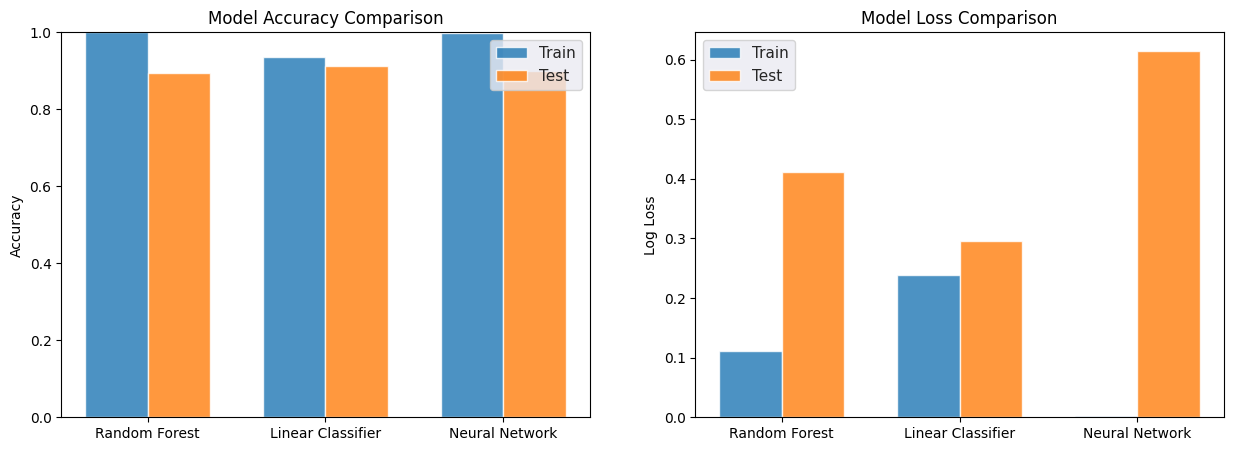

In [ ]:
# Comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Aesthetic settings
sns.set_theme()
sns.set_palette("muted")

width = 0.35
x = np.arange(len(models.keys()))

# Plot train and test accuracies
ax1.bar(x - width/2, train_accuracies, width, label="Train", alpha=0.8)
ax1.bar(x + width/2, test_accuracies, width, label="Test", alpha=0.8)
ax1.set_title("Model Accuracy Comparison")
ax1.set_ylabel("Accuracy")
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(models.keys())
ax1.legend()

# Plot train and test losses
ax2.bar(x - width/2, train_losses, width, label="Train", alpha=0.8)
ax2.bar(x + width/2, test_losses, width, label="Test", alpha=0.8)
ax2.set_title("Model Loss Comparison")
ax2.set_ylabel("Log Loss")
ax2.set_xticks(x)
ax2.set_xticklabels(models.keys())
ax2.legend()

plt.show()
